# Supplementary Figure 1

In [1]:
import os.path as op
import pandas as pd
import numpy as np
import itertools
import seaborn as sns
import matplotlib.pyplot as plt
import plotutils

In [2]:
df_dir = op.join('..', 'data', 'dataframes')

In [3]:
subjects, rois, tasks = plotutils.default_data()

In [4]:
plotutils.set_plot_style()

### Load dataframes

In [5]:
eccen_data =  pd.read_csv(op.join(df_dir, 'group_eccen_data.csv'))
eccen_boots = pd.read_csv(op.join(df_dir, 'group_eccen_data_boots.csv'))

### Supplementary Figure 1

In [6]:
pal = ['#d95f02', '#e6a778']
pal_dict = dict(zip(tasks, pal))
z = dict(zip(tasks, [-10, 10]))

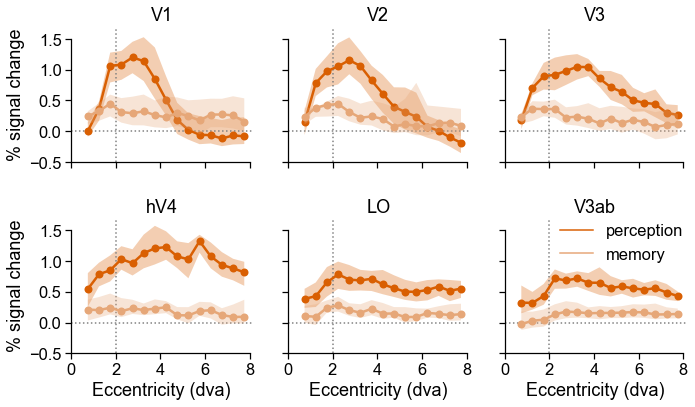

In [7]:
# Plot bold response by eccentricity bin
g = sns.relplot(x='eccen_bin', y='beta_adj', col='roi', col_order=rois, 
                hue='task', hue_order=['perception', 'memory'], kind='line',
                marker='o', markersize=8, markeredgewidth=0, lw=2.5,
                col_wrap=3, palette=pal, height=3, aspect=.9, 
                data=eccen_data)

# Plot confidence intervals
bins = eccen_boots['eccen_bin'].unique()
for (r, t) in itertools.product(g.col_names, tasks):
    ax_i = rois.index(r)
    e = eccen_boots.query("roi==@r & task==@t").pivot(index='n_boot', columns='eccen_bin', values='beta').values
    err_bands = np.nanpercentile(e, [2.5, 97.5], axis=0)
    g.axes.flatten()[ax_i].fill_between(bins, *err_bands, facecolor=pal_dict[t], alpha=.3, zorder=z[t])

    
g.map(plt.axvline, x=2, c=".5", linewidth=1.5, ls=":", zorder=-10)
g.map(plt.axhline, y=0, c=".5", linewidth=1.5, ls=":", zorder=-10)
g.set(xticks=[0, 2, 4, 6, 8], ylim=[-.5, 1.7], yticks=[-.5, 0, .5, 1, 1.5])
g.set_xlabels('Eccentricity (dva)')
g.set_ylabels('% signal change')
g.set_titles(col_template="{col_name}")

leg = g._legend
leg.set_bbox_to_anchor([.97, 0.38])
leg.set_title('')

sns.despine(trim=True)
plt.gcf().tight_layout(h_pad=1.5, w_pad=1.5)